In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
pd.options.display.max_columns = None


# LA GRAN PANDEMIA

### Limpieza de datos

Realizaremos una exploracion de los datos para buscar datos faltantes, duplicados y en su caso extremos. 

In [52]:
df_covid = pd.read_csv('./Covid Data.csv')

In [53]:
df_covid.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,2,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,2,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,2,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,2,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,2,2,2,1,2,2,2,2,2,3,97


In [54]:
df_covid.shape

(1048575, 21)

In [55]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

#### Buscamos datos nulos

En nuestro dataset los valores 97 y 99 se consideran como data faltante. Por lo tanto, los reemplazaremos por NaN y luego se quitaran. 

In [56]:
# reemplazamos todos los 97 y 99 por NaN

df_covid.replace(97, np.nan, inplace=True)
df_covid.replace(98, np.nan, inplace=True)
df_covid.replace(99, np.nan, inplace=True)

df_covid.isnull().sum()


USMER                        0
MEDICAL_UNIT                 0
SEX                          0
PATIENT_TYPE                 0
DATE_DIED                    0
INTUBED                 855869
PNEUMONIA                16003
AGE                        345
PREGNANT                527265
DIABETES                  3338
COPD                      3003
ASTHMA                    2979
INMSUPR                   3404
HIPERTENSION              3104
OTHER_DISEASE             5045
CARDIOVASCULAR            3076
OBESITY                   3032
RENAL_CHRONIC             3006
TOBACCO                   3220
CLASIFFICATION_FINAL         0
ICU                     856032
dtype: int64

In [57]:
#porcentaje de datos faltantes por columna

df_covid.isnull().sum()/df_covid.shape[0]

USMER                   0.000000
MEDICAL_UNIT            0.000000
SEX                     0.000000
PATIENT_TYPE            0.000000
DATE_DIED               0.000000
INTUBED                 0.816221
PNEUMONIA               0.015262
AGE                     0.000329
PREGNANT                0.502840
DIABETES                0.003183
COPD                    0.002864
ASTHMA                  0.002841
INMSUPR                 0.003246
HIPERTENSION            0.002960
OTHER_DISEASE           0.004811
CARDIOVASCULAR          0.002934
OBESITY                 0.002892
RENAL_CHRONIC           0.002867
TOBACCO                 0.003071
CLASIFFICATION_FINAL    0.000000
ICU                     0.816377
dtype: float64

<AxesSubplot: >

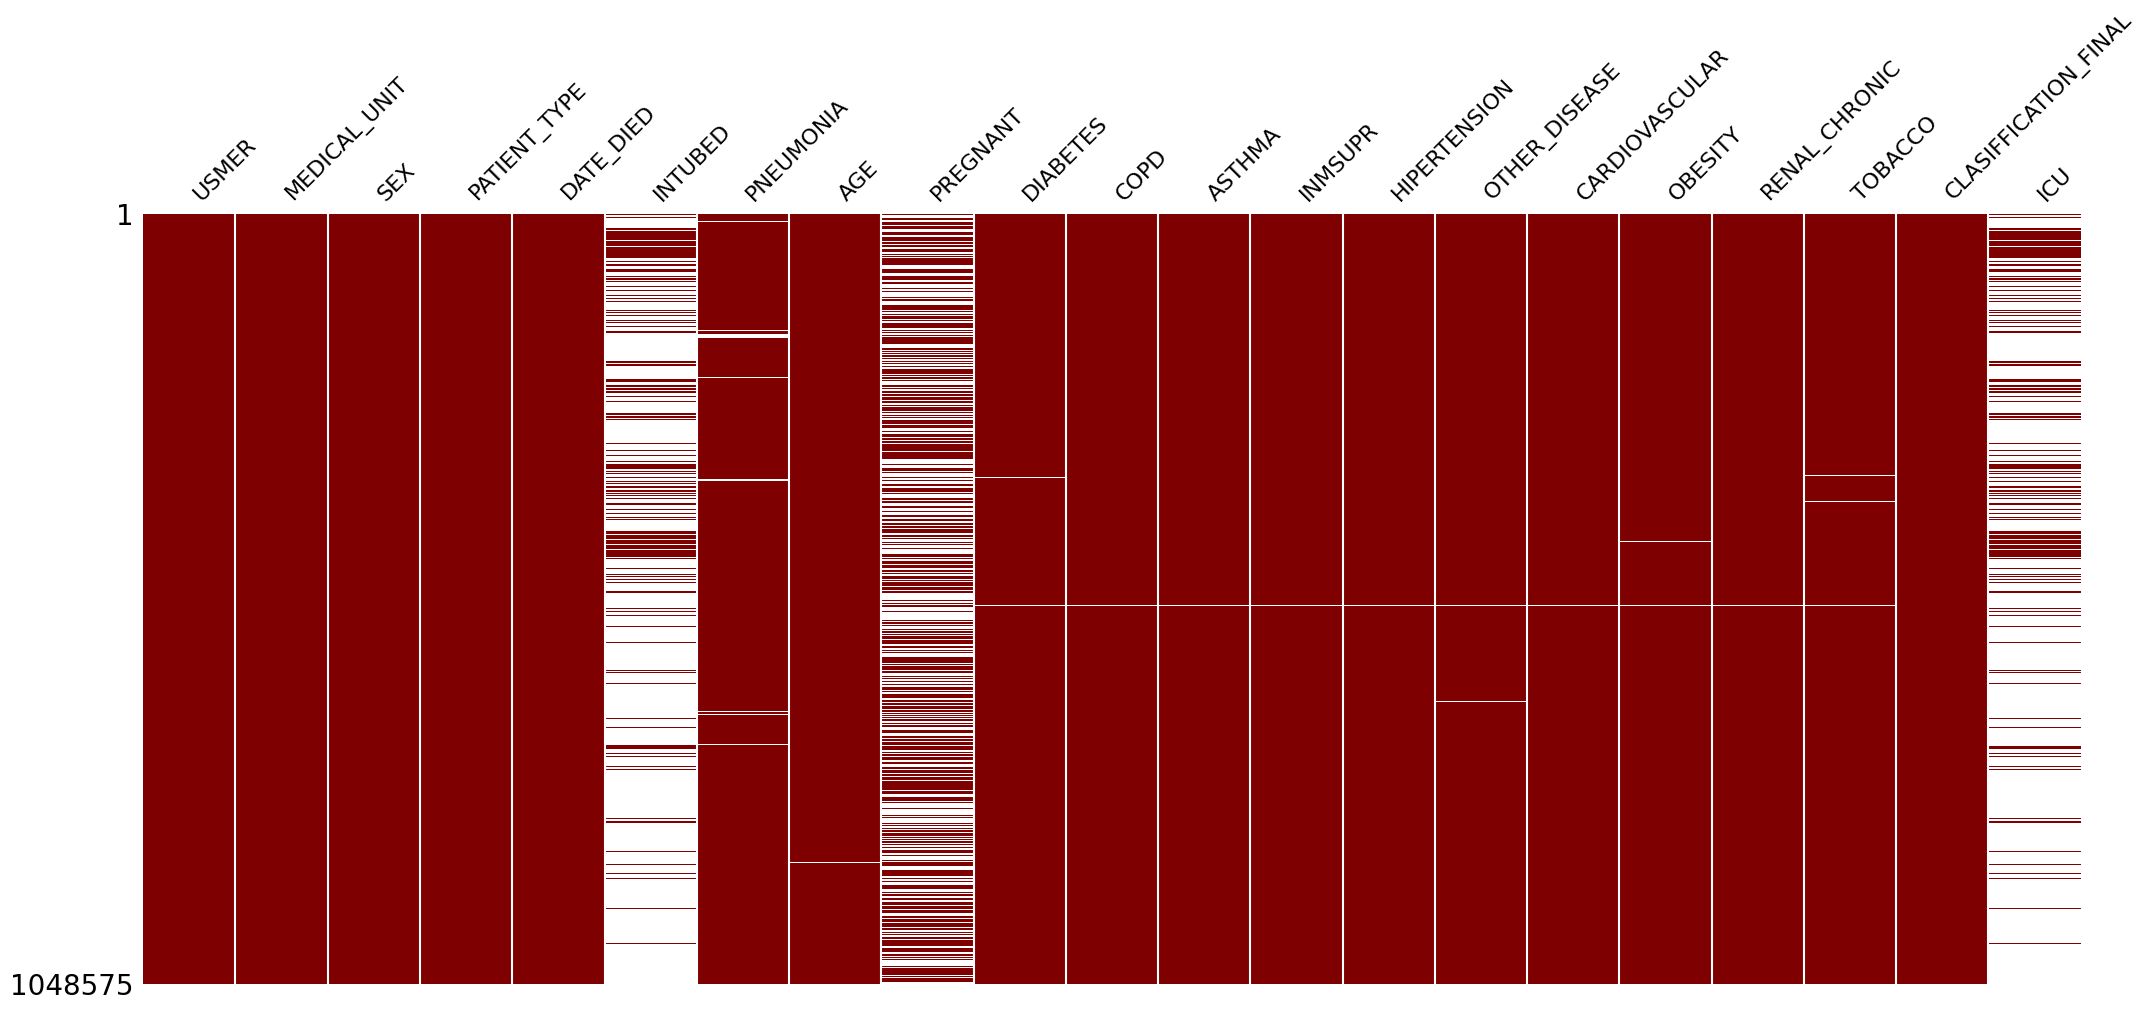

In [58]:
msno.matrix(df_covid, color=(0.5, 0, 0), sparkline=False)

# color de background




Podemos observar que tenemos 5 campos con datos faltantes en el dataset. El dataset cuenta con un total de 1048575 de registros. Como vemos en la tabla, los campos con datos faltantes son: Intubados, neumonia, edad, embarazo y terapita_intensiva. 
De estos campos, Intubados y terapia_intensiva tienen un 81% de datos faltantes y embarazos 49%. Por lo tanto, se eliminaran del dataset por que tienen + de 30% de datos nulos y por lo tanto evitar afectar la informacion.
Para el resto de los campos con nulos se procedera a eliminar la fila que contenga el dato faltante.

In [59]:
# eliminamos las columnas con más del 50% de datos nulos.
for col in df_covid.columns:
    if df_covid[col].isnull().sum()/df_covid.shape[0] > 0.3:
        df_covid.drop(col, axis=1, inplace=True)

df_covid.isnull().sum()/df_covid.shape[0]

USMER                   0.000000
MEDICAL_UNIT            0.000000
SEX                     0.000000
PATIENT_TYPE            0.000000
DATE_DIED               0.000000
PNEUMONIA               0.015262
AGE                     0.000329
DIABETES                0.003183
COPD                    0.002864
ASTHMA                  0.002841
INMSUPR                 0.003246
HIPERTENSION            0.002960
OTHER_DISEASE           0.004811
CARDIOVASCULAR          0.002934
OBESITY                 0.002892
RENAL_CHRONIC           0.002867
TOBACCO                 0.003071
CLASIFFICATION_FINAL    0.000000
dtype: float64

In [60]:
# eliminamos las filas con datos nulos.abs

df_covid.dropna(inplace=True)

df_covid.isnull().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
PNEUMONIA               0
AGE                     0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
dtype: int64

In [61]:
df_covid.shape

(1024829, 18)

#### Buscamos datos duplicados

In [62]:
df_covid.duplicated().sum()

813430

Tenemos 814264 registros duplicados. Pero en este caso es normal por que son registros de personas contagiadas y es posible que compartan las caracteristicas con otras personas. 

### Creamos el campo fallecido

El campo Date died indica mediante la fecha si el paciente murio y si no murio pone 9999-99-99. Creamos un campo de fallecido que sera 1 si murio y 2 si no murio. Esto permitira una mejor lectura y un mejor uso de los datos en el momento de realizar el modelo de prediccion.

In [63]:
# creamos el campo fallecidos a partir del campo date died. Si hay fecha el paciente fallecio, si la fecha es 9999-99-99 el paciente no fallecio.

df_covid['fallecidos'] = df_covid['DATE_DIED'].apply(lambda x: 2 if x == '9999-99-99' else 1)

df_covid.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,PNEUMONIA,AGE,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,fallecidos
0,2,1,1,1,03/05/2020,1.0,65.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,1
1,2,1,2,1,03/06/2020,1.0,72.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,5,1
2,2,1,2,2,09/06/2020,2.0,55.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,1
3,2,1,1,1,12/06/2020,2.0,53.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,1
4,2,1,2,1,21/06/2020,2.0,68.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,1


In [64]:
df_covid.to_csv('./covid_clean.csv', index=False)

<AxesSubplot: >

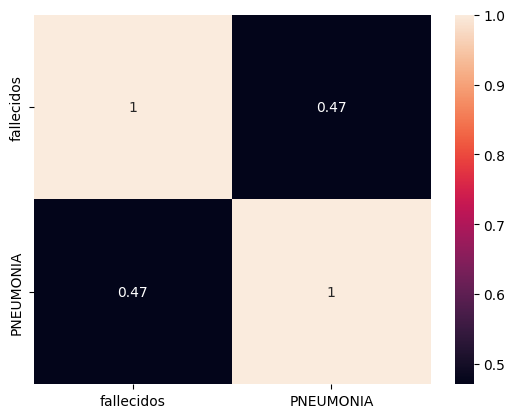

In [65]:
# hacemos un heatmap de muertes y neumonia

sns.heatmap(df_covid[['fallecidos', 'PNEUMONIA']].corr(), annot=True)

C:\Users\ismael\AppData\Local\Temp\ipykernel_7308\2490466195.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_covid.corr(), annot=True, cmap='coolwarm', linewidths=0.2, annot_kws={'size':5}, fmt='.2f')


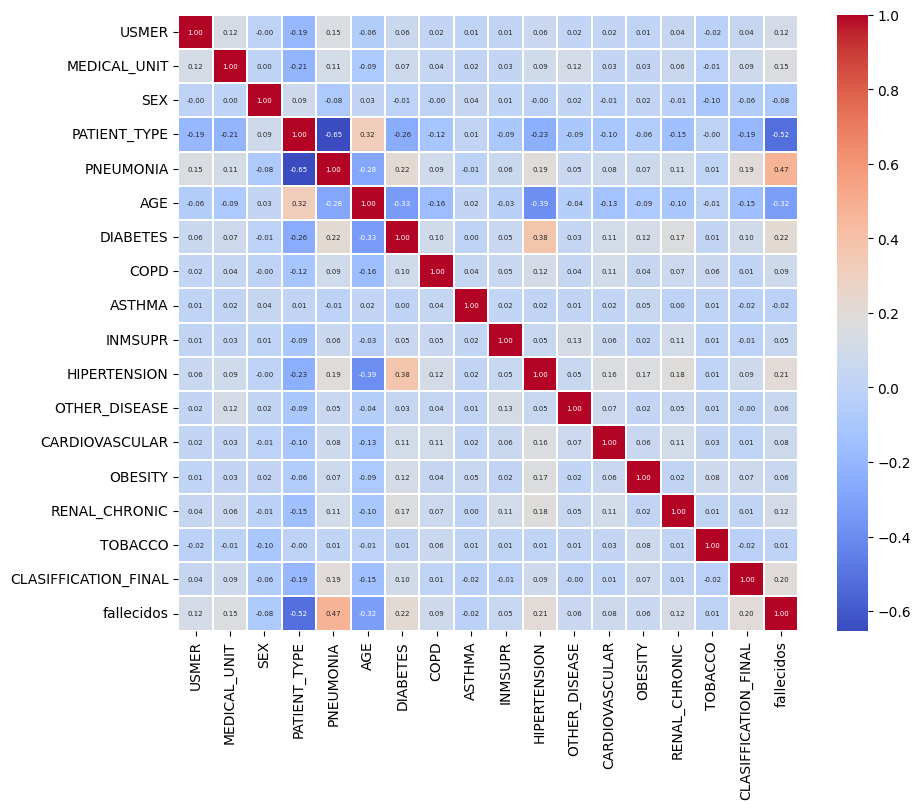

In [66]:
sns.heatmap(df_covid.corr(), annot=True, cmap='coolwarm', linewidths=0.2, annot_kws={'size':5}, fmt='.2f')
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

<AxesSubplot: xlabel='AGE', ylabel='CLASIFFICATION_FINAL'>

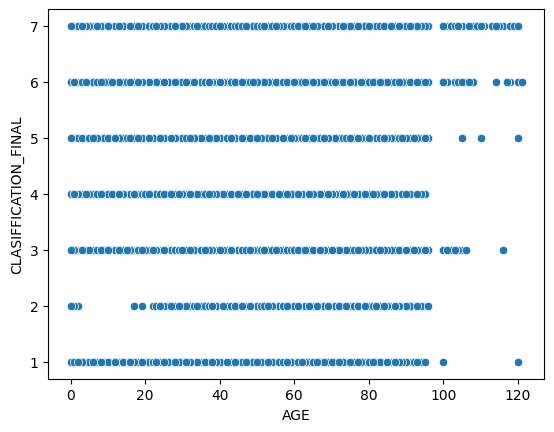

In [67]:
sns.scatterplot(x='AGE', y='CLASIFFICATION_FINAL', data=df_covid)

<AxesSubplot: xlabel='fallecidos', ylabel='AGE'>

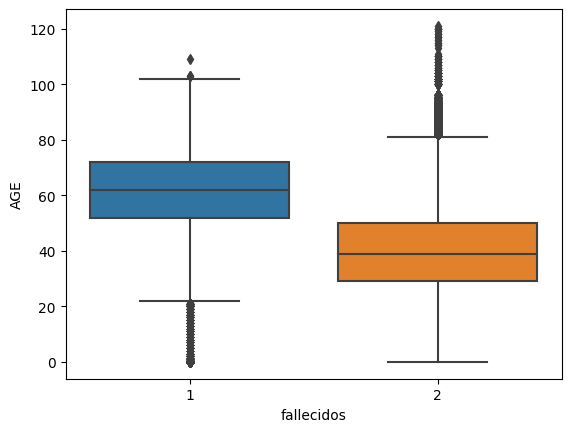

In [68]:
sns.boxplot(x='fallecidos', y='AGE', data=df_covid)